<h1>Flood monitoring in Madagascar based on Landsat 8 imagery</h1>

<div>
<img src="https://miro.medium.com/max/1400/0*EOLdGGHYqGMAitga." width="500" height="500" align="left"/>
</div>

In [ ]:
#!pip install earthpy

<h2>Import Modules</h2>

In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#Set treatment for all types of floating-point errors at once:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
import os
os.getcwd()

'D:\\python_projects\\Satellite_Imagery_Analysis'

In [4]:
%cd input/Madagascar_data

D:\python_projects\Satellite_Imagery_Analysis\input\Madagascar_data


In [5]:
before_path = "Madagascar_18_01_2017/"
during_path = "Madagascar_27_01_2020/"

<h2>Before Floods</h2>
<h3>Read data</h3>

In [8]:
before = glob(r"D:\python_projects\Satellite_Imagery_Analysis\input\Madagascar_data\Madagascar_18_01_2017/*.tiff")
before.sort()
before

['D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B05_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_5

In [9]:
list = []
for i in before:
    with rio.open(i, 'r') as f:
        list.append(f.read(1))

arr_bef = np.stack(list)

arr_bef.shape

(9, 602, 676)

<h3>Data Visualization</h3>

<h4>Visualize Bands</h4>

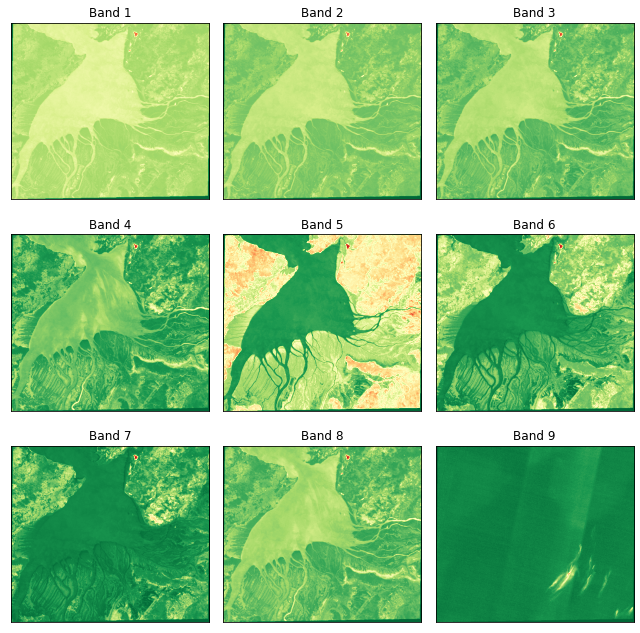

In [10]:
ep.plot_bands(arr_bef,
              cmap='RdYlGn_r',
              cols=3,
              figsize=(9, 9),
              cbar=False)
plt.show()

<h4>Histograms</h4>

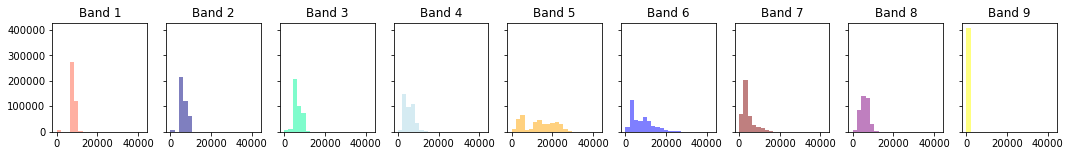

In [52]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_bef, 
        colors = colors,
        title=[f'Band {i}' for i in range(1, 10)], 
        cols=9, 
        alpha=0.5, 
        figsize = (18, 2))

plt.show()

<h4>RGB Composite Image</h4>

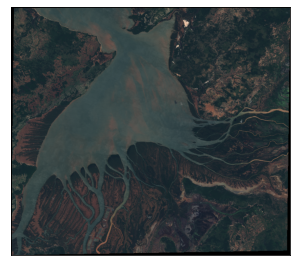

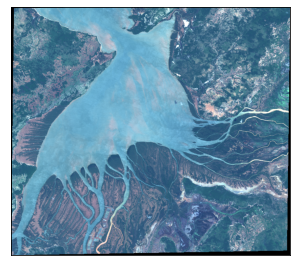

In [12]:
# Bands in a list start from 0, so RGB is no 432, but a 321 combination
ep.plot_rgb(arr_bef,
            rgb=(3, 2, 1),
            figsize=(5, 5))
plt.show()

# RGB Composite Image with Stretching Histogram to make pixels brighter
ep.plot_rgb(arr_bef,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(5, 5))
plt.show()

<h3>Normalized Difference Vegetation Index</h3>

The normalized difference vegetation index (NDVI) is a simple graphical indicator that can be used to analyze remote sensing measurements, often from a space platform, assessing whether or not the target being observed contains live green vegetation.

NDVI = (NIR – Red) / (NIR + Red)

<h4>Visual interpretation of the output image/raster created:</h4>

<ul>
<li>-1 to 0 - bright surface with no vegetation or water content</li>
<li>+1 - represent water content</li>
</ul>

In [13]:
# NIR is the 5th band, but 5-1=4 in a list, starting from 0
# Red is the 4th band, but 4-1=3 in a list, starting from 0

ndvi_bef = es.normalized_diff(arr_bef[4], arr_bef[3])

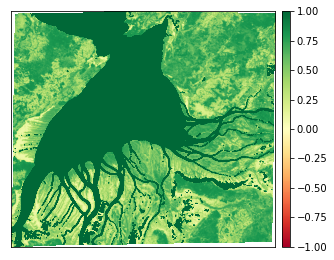

In [14]:
ep.plot_bands(ndvi_bef,
              cmap='RdYlGn',
              vmin=-1,
              vmax=1,
              figsize=(5, 5))
plt.show()

<h3>Normalized Difference Water Index (NDWI). Formula 1</h3>

Normalized Difference Water Index (NDWI) may refer to one of at least two remote sensing-derived indexes related to liquid water.
<ul>
<li>One is used to monitor changes in water content of leaves, using near-infrared (NIR) and short-wave infrared (SWIR) wavelengths:</li>

NDWI = (NIR – SWIR) / (NIR + SWIR), proposed by Gao in 1996

<h4>Visual interpretation of the output image/raster created:</h4>

<ul>
<li>-1 to 0 - bright surface with no vegetation or water content</li>
<li>+1 - represent water content</li>
</ul>

In [15]:
# NIR is the 5th band, but 5-1=4 in a python list, starting from 0
# SWIR is the 7th band, but 7-1=6 in a python list, starting from 0

ndwi_bef = es.normalized_diff(b1=arr_bef[5],
                              b2=arr_bef[7])

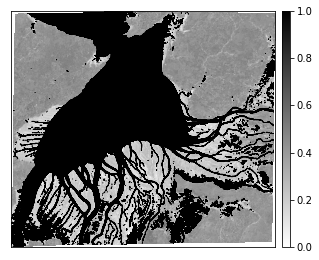

In [16]:
ep.plot_bands(ndwi_bef,
              cmap='gray_r',
              vmin=0,
              vmax=1,
              figsize=(5, 5))
plt.show()

<h3>Normalized Difference Water Index (NDWI). Formula 2</h3>

<li>Another is used to monitor changes related to water content in water bodies, using green and NIR wavelengths:</li>

NDWI = (Green – NIR) / (Green + NIR), defined by McFeeters in 1996

<h4>Visual interpretation of the output image/raster created:</h4>

<ul>

<li>< 0.3 - Non-water</li>
<li>>= 0.3 - Water</li>
</ul>

In [17]:
# Green is the 3rd band, but 3-1=2 in a python list, starting from 0
# NIR is the 5th band, but 5-1=4 in a python list, starting from 0

ndwi2_bef = es.normalized_diff(b1=arr_bef[3],
                               b2=arr_bef[5])

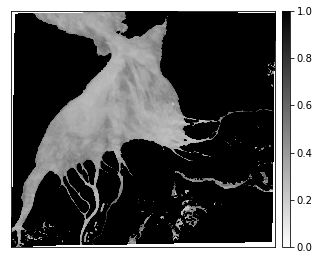

In [18]:
ep.plot_bands(ndwi2_bef,
              cmap='gray_r',
              vmin=0,
              vmax=1,
              figsize=(5, 5))
plt.show()

<h2>After Floods</h2>

<h3>Read data</h3>

In [19]:
after = glob(r"D:\python_projects\Satellite_Imagery_Analysis\input\Madagascar_data\Madagascar_27_01_2020/*.tiff")
after.sort()
before

['D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B05_(Raw).tiff',
 'D:\\python_projects\\Satellite_Imagery_Analysis\\input\\Madagascar_data\\Madagascar_18_01_2017\\2017-01-18-00_00_2017-01-18-23_5

In [20]:
list_2 =[]
for i in after:
    with rio.open (i, "r") as f:
        list_2.append(f.read(1))
        
arr_aft = np.stack(list_2)
arr_aft.shape

(9, 602, 676)

<h3>Data Visualization</h3>

<h4>Visualize Bands</h4>

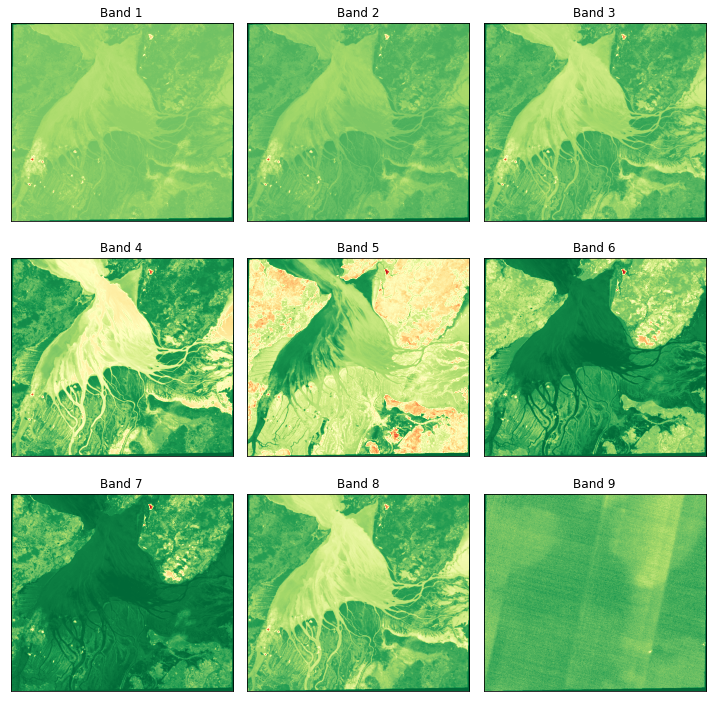

In [48]:
ep.plot_bands(arr_aft,
              cmap='RdYlGn_r',
              cols=3,
              figsize=(10, 10),
              cbar=False)
plt.show()

<h4>Histograms</h4>

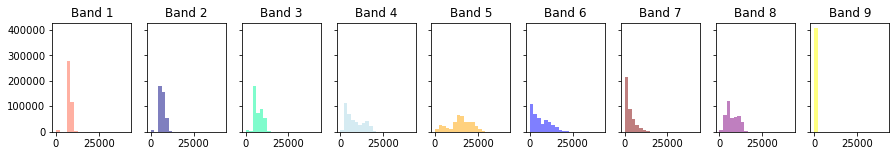

In [37]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_aft, 
        colors = colors,
        title=[f'Band {i}' for i in range(1, 10)], 
        cols=9, 
        alpha=0.5, 
        figsize = (15, 2))

plt.show()

<h4>RGB Composite Image</h4>

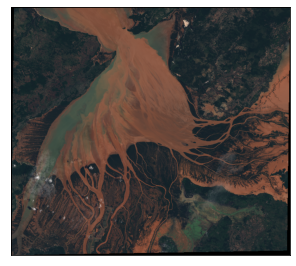

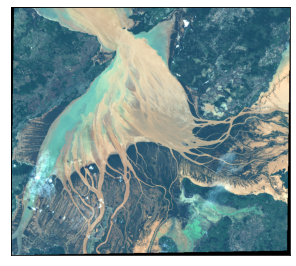

In [23]:
# Bands in a list start from 0, so RGB is no 432, but a 321 combination
ep.plot_rgb(arr_aft,
            rgb=(3, 2, 1),
            figsize=(5, 5))
plt.show()

# RGB Composite Image with Stretching Histogram to make pixels brighter
ep.plot_rgb(arr_aft,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(5, 5))
plt.show()

<h3>Normalized Difference Water Index</h3>

NDWI = (NIR – SWIR) / (NIR + SWIR), proposed by Gao in 1996

In [24]:
# NIR is the 5th band, but 5-1=4 in a python list, starting from 0
# SWIR is the 7th band, but 7-1=6 in a python list, starting from 0

ndwi_aft = es.normalized_diff(b1=arr_aft[5],
                              b2=arr_aft[7])

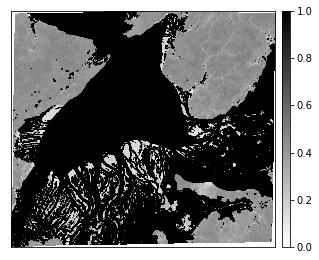

In [25]:
ep.plot_bands(ndwi_aft,
              cmap='gray_r',
              vmin=0,
              vmax=1,
              figsize=(5, 5))
plt.show()

<h2>Flood Mapping</h2>

Mask the data into water and non water pixels based on a threshold value(0.6)

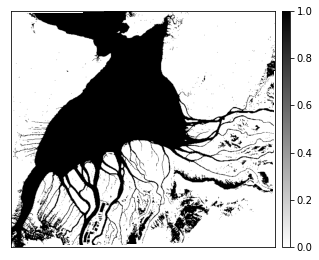

In [26]:
# Mask fefore flooding
mask_bef = (ndwi_bef > 0.6).astype(int)

ep.plot_bands(mask_bef, cmap='gray_r', figsize=(5, 5))
plt.show()

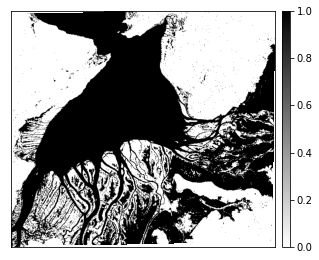

In [27]:
# Mask after flooding
mask_aft = (ndwi_aft > 0.6).astype(int)

ep.plot_bands(mask_aft, cmap='gray_r', figsize=(5, 5))
plt.show()

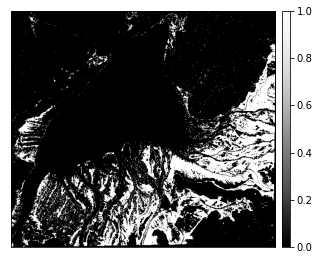

In [28]:
# Mask of difference
mask_diff = (mask_aft - mask_bef)
mask_diff = np.where(mask_diff <0, 0, mask_diff)

ep.plot_bands(mask_diff, cmap='Greys_r', figsize=(5, 5))
plt.show()

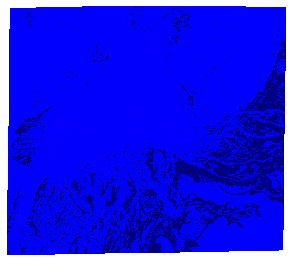

In [29]:
from matplotlib.colors import colorConverter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# create dummy data
ndwi_aft = ndwi_aft
mask_diff = mask_diff

# generate the colors for your colormap
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')

# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['blue','red'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)

cmap2._init() # create the _lut array, with rgba values

# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 0.5, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig = plt.figure(figsize=(5, 5)) 
plt.imshow(ndwi_aft, interpolation='nearest', cmap= cmap1, )
plt.imshow(mask_diff, interpolation='nearest', cmap=cmap2, label='flood')
# plt.colorbar()
plt.axis('off')

plt.show()

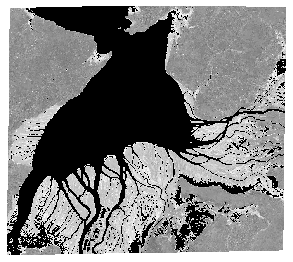

In [30]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(ndwi_bef,
           vmin=0,
           vmax=1,
           cmap='gray_r',
           interpolation='none')
plt.axis('off')
plt.show()

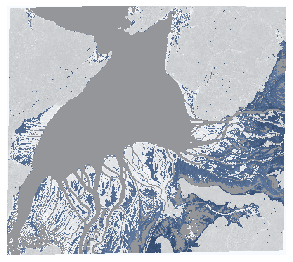

In [31]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(mask_diff,
           vmin=0,
           vmax=1,
           cmap='Blues',
           interpolation='none')
plt.imshow(ndwi_bef,
           vmin=0,
           vmax=1,
           cmap='gray_r',
           interpolation='none',
           alpha=0.4)
plt.axis('off')
plt.show()

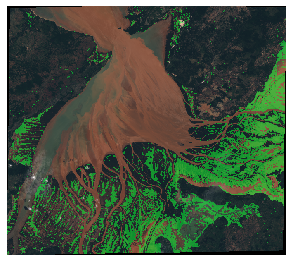

In [32]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(5, 5))

rgb = np.moveaxis(np.stack([list_2[3], list_2[2], list_2[1]]), 0, -1)
Image = rgb/np.amax(rgb)
Image = np.clip(Image, 0, 1)

plt.imshow(Image, interpolation='none')
plt.imshow(mask_diff,
           vmin=0,
           vmax=1, 
           cmap=ListedColormap(['#ffffff00', '#00FF33']), 
           interpolation='none',
           alpha=0.5)

plt.axis('off')
#plt.savefig('flood_result.png', dpi=400)

plt.show()